
##   Project : EDA and Statistical Analysis of Women Clothing feedback

##  Overview :
This Statistics and EDA project is designed to train and test you on basic Data Exploratory and Statistical techniques used in the industry today. Apart from bringing you to speed with basic descriptive and inferential methods, you will also deep dive into a dataset and perform thorough cleaning and analysis in order to draw useful business insights from the data. This will expose you to what data scientists do most often–Exploratory Data Analysis.

## Goals :
1. Using the core statistical theoretical concepts and knowledge to solve real time problem statements.
2. Visualize a real time industry scenario where one can use these statistical concepts.
3. Detailed data analysis and number crunching using statistics
4. Exhaustive report building using EDA and visualization techniques to help the business take decisions using insights from the data

This dataset contains self-reported clothing-fit feedback from customers as well as other side information like reviews, ratings, product categories, catalog sizes, customers’ measurements (etc.) from 2 websites:

* Mod Cloth : Mod Cloth sells women’s vintage clothing and accessories, from which the curator of the dataset collected data from three categories: dresses, tops, and bottoms.

* Rent the runway : Rent The Run Way is a unique platform that allows women to rent clothes for various occasions; they collected data from several categories.

## About dataset
### Field Description:
*    item_id: unique product id

*    waist: waist measurement of customer

*    size: the standardized size of the product

*    quality: rating for the product

*    cup size: cup size measurement of customer

*    hips: hip measurement of customer

*    bra size: bra size of customer

*    category: the category of the product

*    bust: bust measurement of customer

*    height: height of the customer

*    length: feedback on the length of the product

*    fit: fit comfortability feedback

*    user_id: a unique id for the customer

*    shoe size: shoe size of the customer

*    shoe width: shoe width of the customer

*    review_text: review of customer

*    review_summary: review summary

## Problem Statement:
Let’s assume you are working as a data scientist in a newly started textile company. You have given a dataset that consists of most of the features related to the measurements, clothes types, Product ID, User ID, etc. Now you suppose to work the dataset to identify the patterns to understand the customer’s preferred brands and how the company needs to brand its products based on the patterns that you will be found them out. Explore all the EDA concepts you learned and use a statistical test to ensure that your identification is true or false.

#### Q1. Read the datasets, Check the data types and Change the data types appropriately.

In [31]:
cloth = pd.read_json('modcloth_final_data.json', lines=True)
cloth.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [32]:
cloth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [33]:
# Checking numerical data types :

cloth.select_dtypes(include=np.number).columns

Index(['item_id', 'waist', 'size', 'quality', 'hips', 'bra size', 'user_id',
       'shoe size'],
      dtype='object')

In [34]:
# Checking categorical data types :

cloth.select_dtypes(include='object').columns

Index(['cup size', 'category', 'bust', 'height', 'user_name', 'length', 'fit',
       'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [35]:
# Bust column :
cloth['bust'] = cloth['bust'].replace(to_replace='37-39', value='38')
cloth['bust'] = cloth['bust'].astype(np.number)

#### Q2. Change the height column datatype to float after converting the values as shown Below

In [36]:
# filling the nan value in height column :

cloth.height.unique()

array(['5ft 6in', '5ft 2in', '5ft 7in', nan, '5ft 4in', '5ft 3in',
       '5ft 5in', '5ft 10in', '5ft 8in', '5ft', '5ft 9in', '5ft 1in',
       '5ft 11in', '4ft 11in', '4ft 10in', '6ft', '3ft 4in', '4ft 9in',
       '6ft 3in', '6ft 1in', '6ft 2in', '3ft', '4ft 7in', '4ft 4in',
       '7ft 11in', '4ft 2in', '6ft 6in', '4ft 8in', '6ft 4in', '3ft 11in',
       '6ft 5in', '7ft 6in', '3ft 6in', '3ft 3in', '6ft 8in', '7ft 5in',
       '7ft 3in', '7ft 7in', '6ft 7in', '4ft 5in', '3ft 2in', '4ft 6in'],
      dtype=object)

In [37]:
# Filling most occured value in missing values :

value = cloth['height'].mode()[0]
cloth['height'].fillna(value,inplace=True)

In [38]:
# Creating a user defined function :

def fun(x):
    x=str(x)
    l=x.split(' ')
    l2=[]
    for i in l:
        l2.append(i[:-2])
    x = '.'.join(l2)
    return x

# passing height column as parameter in function above :
cloth['height'] = cloth['height'].apply(fun)

# Changing the datatype to float :
cloth['height'] = cloth['height'].astype('float')

In [39]:
# Checking for the change made :
cloth.height.info()

<class 'pandas.core.series.Series'>
RangeIndex: 82790 entries, 0 to 82789
Series name: height
Non-Null Count  Dtype  
--------------  -----  
82790 non-null  float64
dtypes: float64(1)
memory usage: 646.9 KB


#### Q3. Rename the names of the columns which have space in between the column. Ex: shoe size as shoe_size etc.

In [40]:
# Columns name :
cloth.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [41]:
# Replacing space btw column name :
cloth.columns = cloth.columns.map(lambda x : x.replace(' ','_'))

In [42]:
# Checking for the change made :
cloth.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text'],
      dtype='object')

#### Q4. Check the missing values and Identify the distribution of the variables to impute the missing values. Explain based on your analysis decide the features which can be dropped and Which can be imputed. And also explain the reason to choose the metric that you have chosen to impute the null values.

In [43]:
# Creating a copy :
copy = cloth.copy()

##### a. Check the count and percentage of missing values.

In [44]:
#count of missing values :
miss = copy.isnull().sum()[copy.isnull().sum()!=0]
miss

waist             79908
quality              68
cup_size           6255
hips              26726
bra_size           6018
bust              70936
length               35
shoe_size         54875
shoe_width        64183
review_summary     6725
review_text        6725
dtype: int64

In [45]:
# Percentage of missing values :
percent_missing = round((copy.isnull().sum()*100/copy.isnull().count()),2)
percent_missing

item_id            0.00
waist             96.52
size               0.00
quality            0.08
cup_size           7.56
hips              32.28
bra_size           7.27
category           0.00
bust              85.68
height             0.00
user_name          0.00
length             0.04
fit                0.00
user_id            0.00
shoe_size         66.28
shoe_width        77.53
review_summary     8.12
review_text        8.12
dtype: float64

##### b. Check the Mean and Median.

In [46]:
# Mean
copy.mean()

item_id      469325.229170
waist            31.319223
size             12.661602
quality           3.949058
hips             40.358501
bra_size         35.972125
bust             37.499241
height            5.455612
user_id      498849.564718
shoe_size         8.145818
dtype: float64

In [47]:
# Median
copy.median()

item_id      454030.0
waist            30.0
size             12.0
quality           4.0
hips             39.0
bra_size         36.0
bust             36.0
height            5.5
user_id      497913.5
shoe_size         8.0
dtype: float64

##### c. Check the distribution of the variables using Histogram or Dist plot or KDE and boxplot etc. Kindly explore at least two

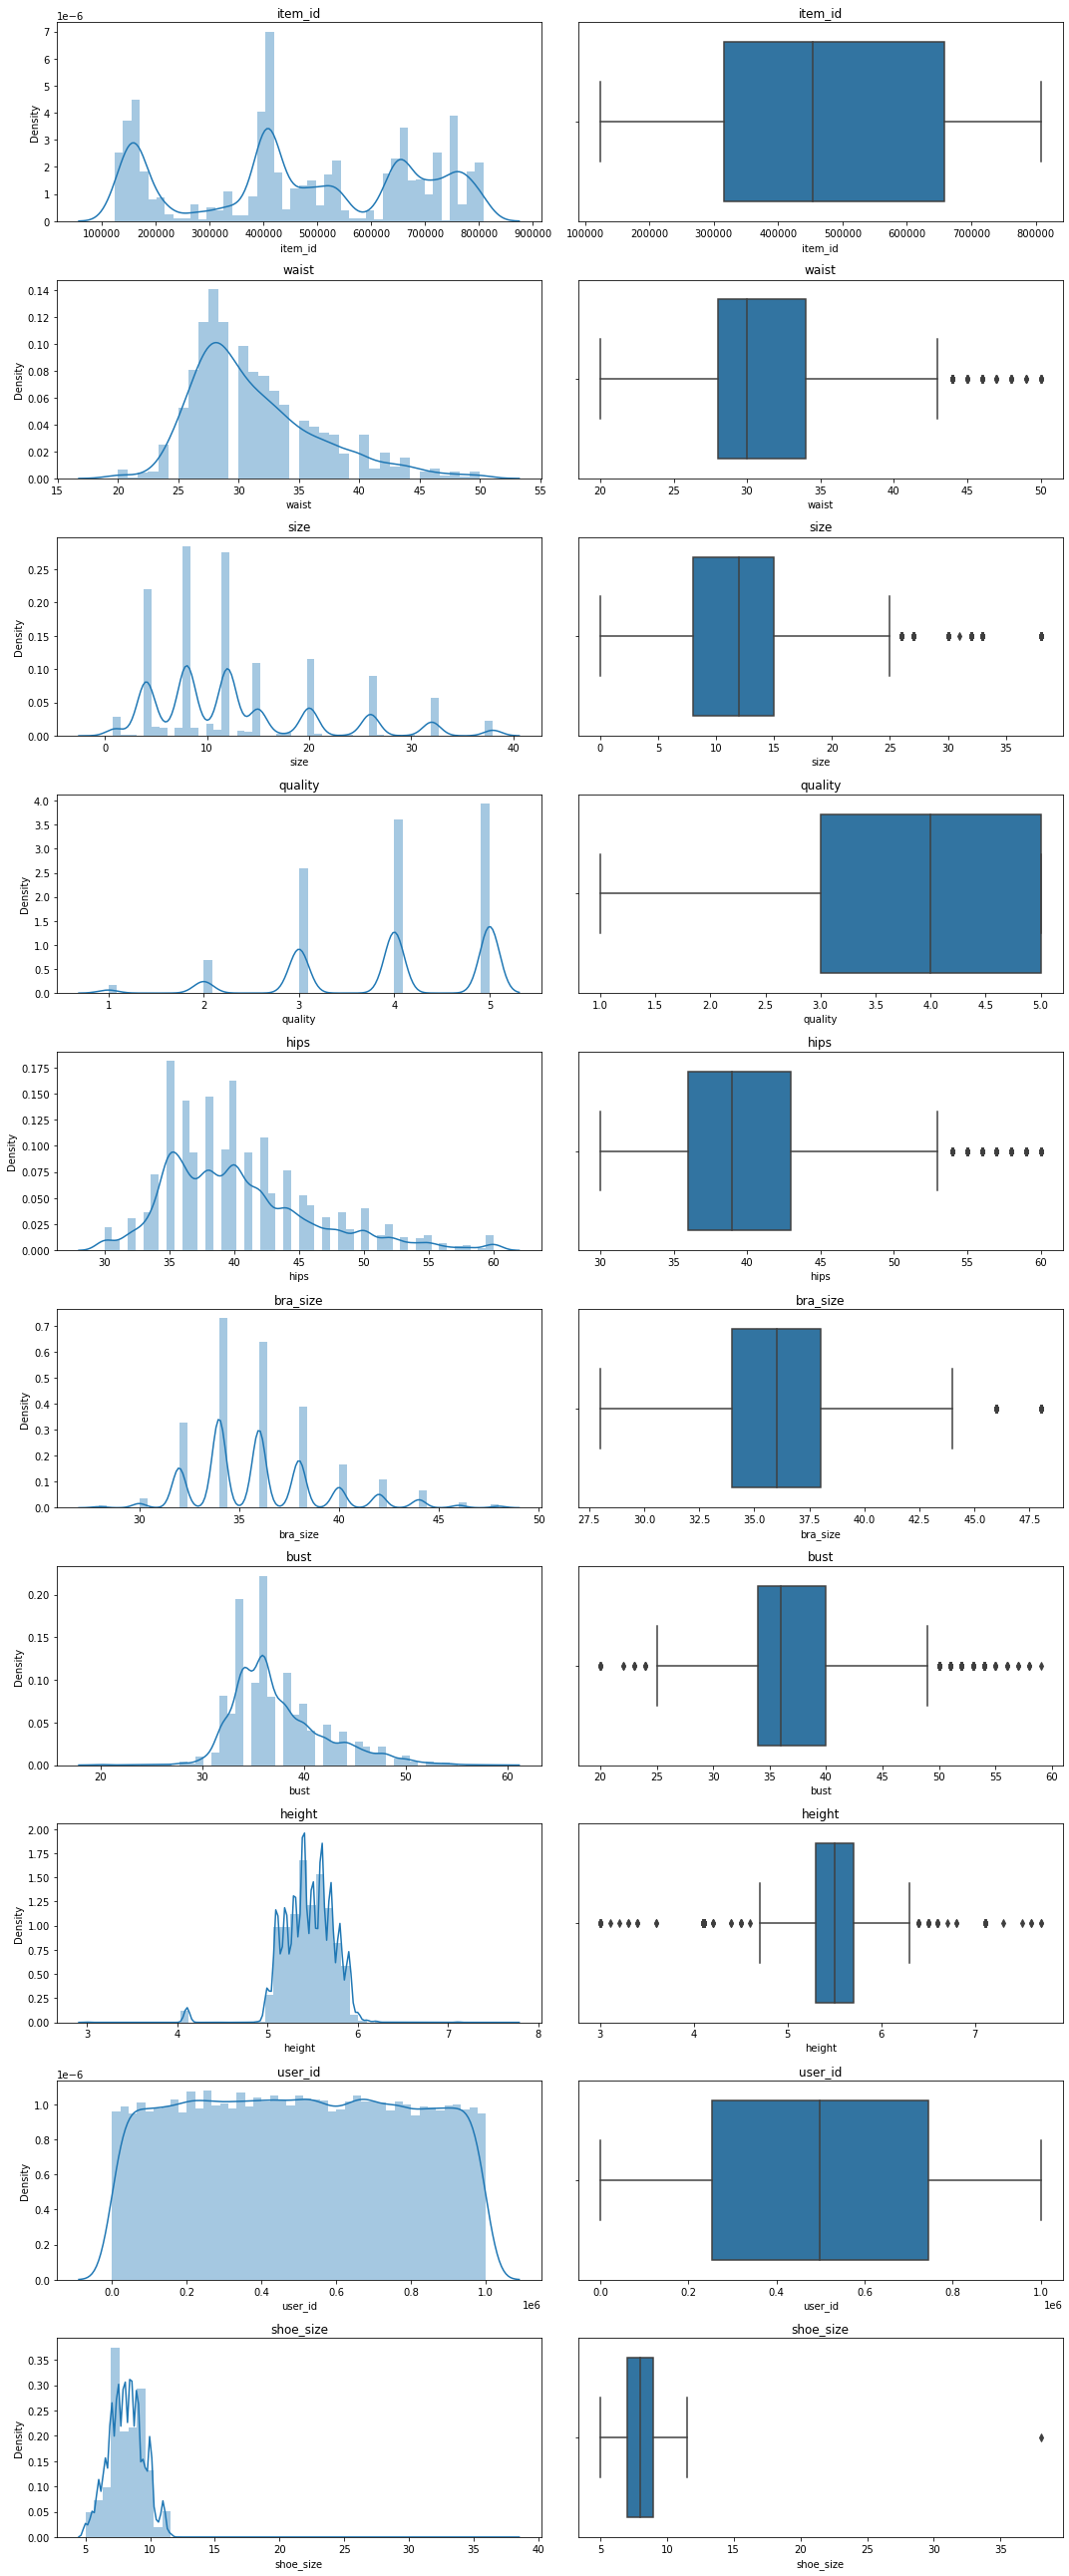

In [48]:
# For numerical veriables:
num = copy.select_dtypes(include=np.number).columns

count = 1

plt.figure(figsize=(15,36))
for i in num:
    
    plt.subplot(10,2,count)        
    sns.distplot(copy[i])
    plt.title(i)
    count+=1
    plt.subplot(10,2,count)        
    sns.boxplot(copy[i])
    plt.title(i)
    count+=1
    
plt.tight_layout()
plt.show()

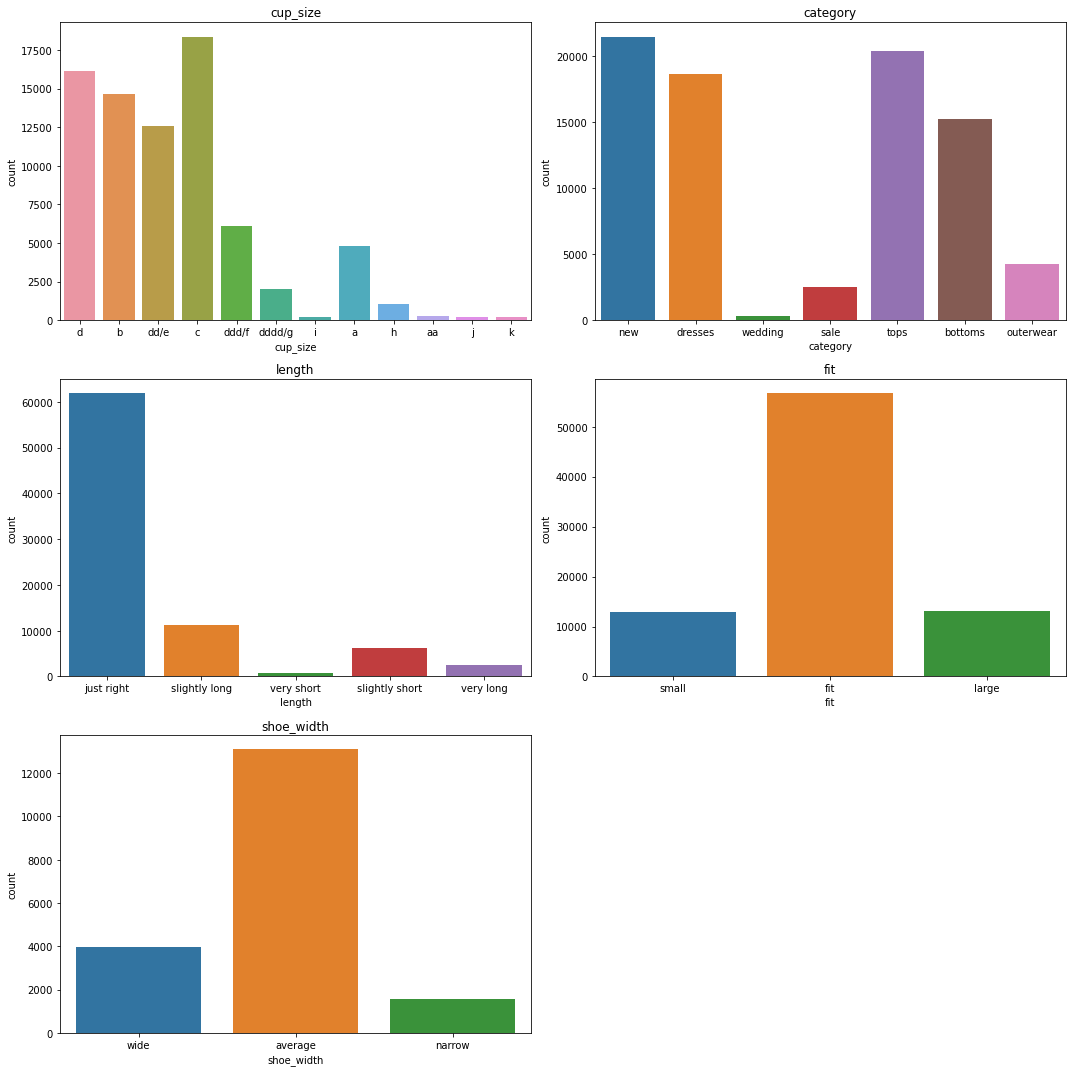

In [49]:
# For categorical columns

cat = ['cup_size', 'category', 'length', 'fit', 'shoe_width']

count = 1

plt.figure(figsize=(15,15))
for i in cat:
    
    plt.subplot(3,2,count)        
    sns.countplot(copy[i])
    plt.title(i)
    count+=1
    
plt.tight_layout()
plt.show()

##### d. Check the Skewness and Kurtosis. Explain what the Skewness and Kurtosis describe.

In [50]:
# Skewness :
copy.skew()

item_id     -0.120644
waist        0.993061
size         1.128301
quality     -0.676777
hips         0.969187
bra_size     0.901004
bust         0.951916
height      -1.094186
user_id      0.008201
shoe_size    0.436713
dtype: float64

In [51]:
# Kurtosis :
copy.kurtosis()

item_id     -1.215909
waist        0.836624
size         0.760010
quality     -0.167085
hips         0.848464
bra_size     1.039445
bust         1.207658
height       5.404265
user_id     -1.182436
shoe_size    8.448820
dtype: float64

In [52]:
copy.shoe_size.unique()

array([ nan,  9. ,  8.5, 11. ,  7. ,  6. ,  8. ,  6.5, 10. ,  7.5,  5.5,
        9.5, 10.5,  5. , 11.5, 38. ])

In [53]:
copy.shoe_size.value_counts()

8.5     3982
8.0     3832
7.5     3704
9.0     3599
7.0     3193
10.0    2419
6.5     1829
9.5     1806
6.0     1338
11.0     860
5.5      589
10.5     356
5.0      316
11.5      91
38.0       1
Name: shoe_size, dtype: int64

##### e. Based on the above approach impute the missing values with the right metric. Or If you want to get some analysis before imputing missing values feel free to explore the analysis.

In [54]:
# Dropping unnecessary column 'review_text' :
copy.drop('review_text',axis=1,inplace=True)

In [55]:
copy.shoe_size.unique()

array([ nan,  9. ,  8.5, 11. ,  7. ,  6. ,  8. ,  6.5, 10. ,  7.5,  5.5,
        9.5, 10.5,  5. , 11.5, 38. ])

In [56]:
copy.shoe_size.value_counts()

8.5     3982
8.0     3832
7.5     3704
9.0     3599
7.0     3193
10.0    2419
6.5     1829
9.5     1806
6.0     1338
11.0     860
5.5      589
10.5     356
5.0      316
11.5      91
38.0       1
Name: shoe_size, dtype: int64

In [57]:
copy.shoe_size.replace(to_replace=[38.0,np.nan],value=[8,8.5],inplace=True)

In [58]:
copy['waist'] = copy['waist'].fillna(copy['waist'].median())
copy['quality'] = copy['quality'].fillna(copy['quality'].median())
copy['cup_size'] = copy['cup_size'].fillna(copy['cup_size'].mode()[0])
copy['hips'] = copy['hips'].fillna(copy['hips'].median())
copy['bra_size'] = copy['bra_size'].fillna(copy['bra_size'].median())
copy['bust'] = copy['bust'].fillna(copy['bust'].mode()[0])
copy['length'] = copy['length'].fillna(copy['length'].mode()[0])
copy['shoe_width'] = copy['shoe_width'].fillna(copy['shoe_width'].mode()[0])
copy['review_summary'] = copy['review_summary'].fillna(copy['review_summary'].mode()[0])

In [59]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           82790 non-null  float64
 2   size            82790 non-null  int64  
 3   quality         82790 non-null  float64
 4   cup_size        82790 non-null  object 
 5   hips            82790 non-null  float64
 6   bra_size        82790 non-null  float64
 7   category        82790 non-null  object 
 8   bust            82790 non-null  float64
 9   height          82790 non-null  float64
 10  user_name       82790 non-null  object 
 11  length          82790 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe_size       82790 non-null  float64
 15  shoe_width      82790 non-null  object 
 16  review_summary  82790 non-null  object 
dtypes: float64(7), int64(3), object

##### Q5. Find the outliers which are below and above Q1 - 2.5 * IQR and 2.5 * IQR + Q3

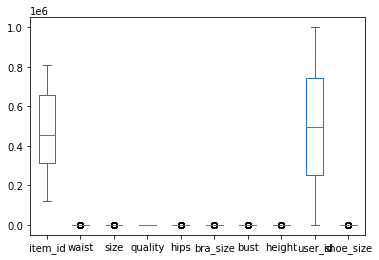

In [60]:
copy.plot(kind='box')
plt.show()

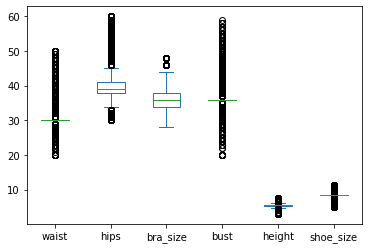

In [61]:
copy.drop(['item_id','user_id','size','quality'],axis=1).plot(kind='box')
plt.show()

In [62]:
q1 = copy.quantile(0.25)
q3 = copy.quantile(0.75)
IQR = q3-q1

l  = q1 - 2.5*IQR
u = q3 + 2.5*IQR

out = copy.loc[((copy<l)|(copy>u)).any(axis=1)]
out.head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary
0,123373,29.0,7,5.0,d,38.0,34.0,new,36.0,5.6,Emily,just right,small,991571,8.5,average,Love it!
1,123373,31.0,13,3.0,b,30.0,36.0,new,36.0,5.2,sydneybraden2001,just right,small,587883,8.5,average,Love it!
2,123373,30.0,7,2.0,b,39.0,32.0,new,36.0,5.7,Ugggh,slightly long,small,395665,9.0,average,Love it!
5,123373,27.0,11,5.0,c,41.0,36.0,new,36.0,5.4,Doreenajane,just right,small,162012,8.5,average,Love it!
6,123373,26.0,5,1.0,b,39.0,32.0,new,36.0,5.3,barbiejenks,just right,large,114843,8.5,average,Love it!


#### Q6. Check for the category dress review and visualize the top 10 reviews using any relevant plot. Identify the negative reviews if there are any.

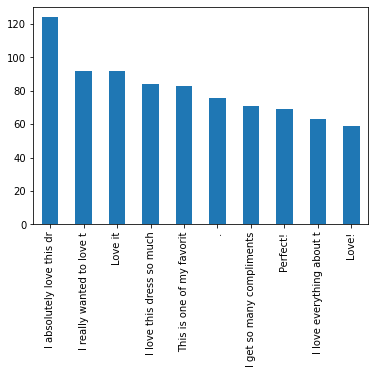

In [63]:
copy['review_summary'].value_counts().iloc[1:11].plot(kind='bar')
plt.show()

#### Q7. Find out the average shoe size for the different fits of the customer. Visualize using any relevant plot. Explain that, Is there any significant different shoe sizes for different fits?

In [64]:
copy.groupby('fit')['shoe_size'].mean()

fit
fit      8.363365
large    8.399954
small    8.434060
Name: shoe_size, dtype: float64

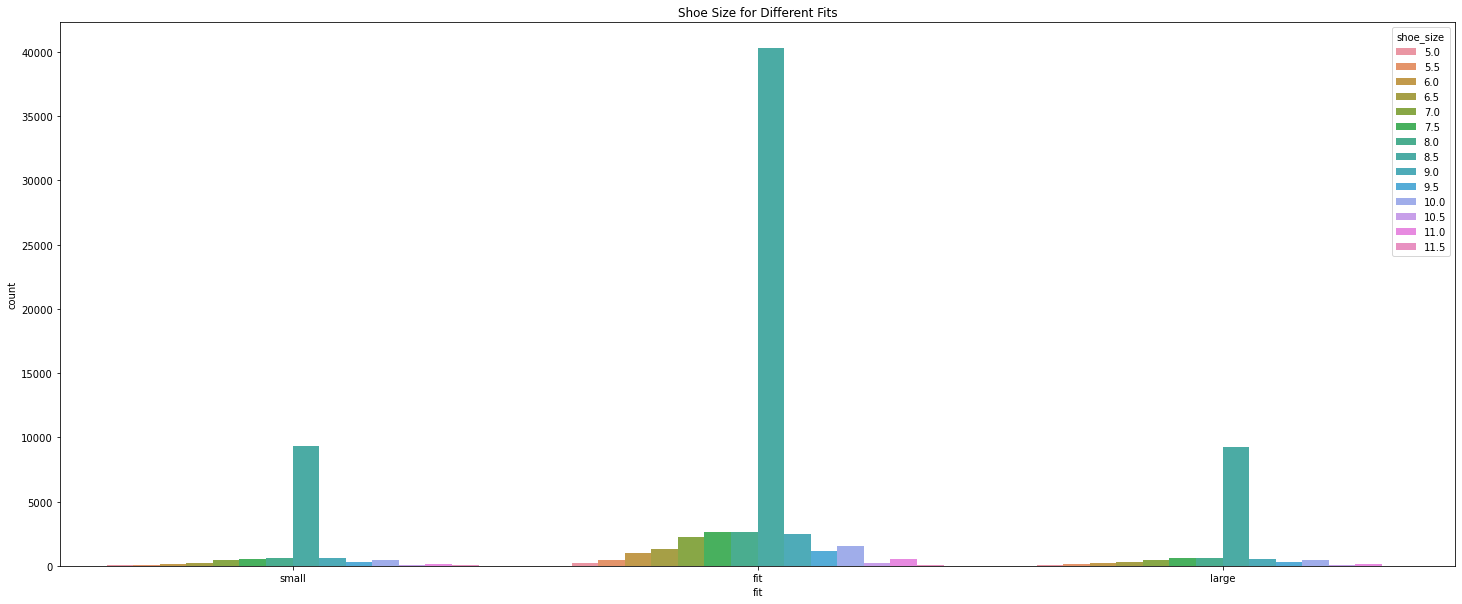

In [65]:
plt.figure(figsize=(25,10))
sns.countplot(copy['fit'], hue=copy['shoe_size'])
plt.title('Shoe Size for Different Fits')
plt.show()

#### Q8. Identify the customer’s common shoe width and average size for those who purchased the maximum quality. Is the mode of shoe width affect the user review? Visualize using the appropriate plot.

In [66]:
temp = copy[copy['quality'] == copy['quality'].max()]
temp.shoe_width.value_counts()

average    27564
wide        1433
narrow       607
Name: shoe_width, dtype: int64

In [67]:
# Customer common shoe width for those who purchased the maximum quality is :   average

In [68]:
temp.shoe_size.value_counts()

8.5     20490
8.0      1474
7.5      1397
9.0      1364
7.0      1222
10.0      865
6.5       704
9.5       623
6.0       570
11.0      348
5.5       242
10.5      137
5.0       135
11.5       33
Name: shoe_size, dtype: int64

In [69]:
# Cusotmer average size for those who purchased the maximum quality is :        8.5

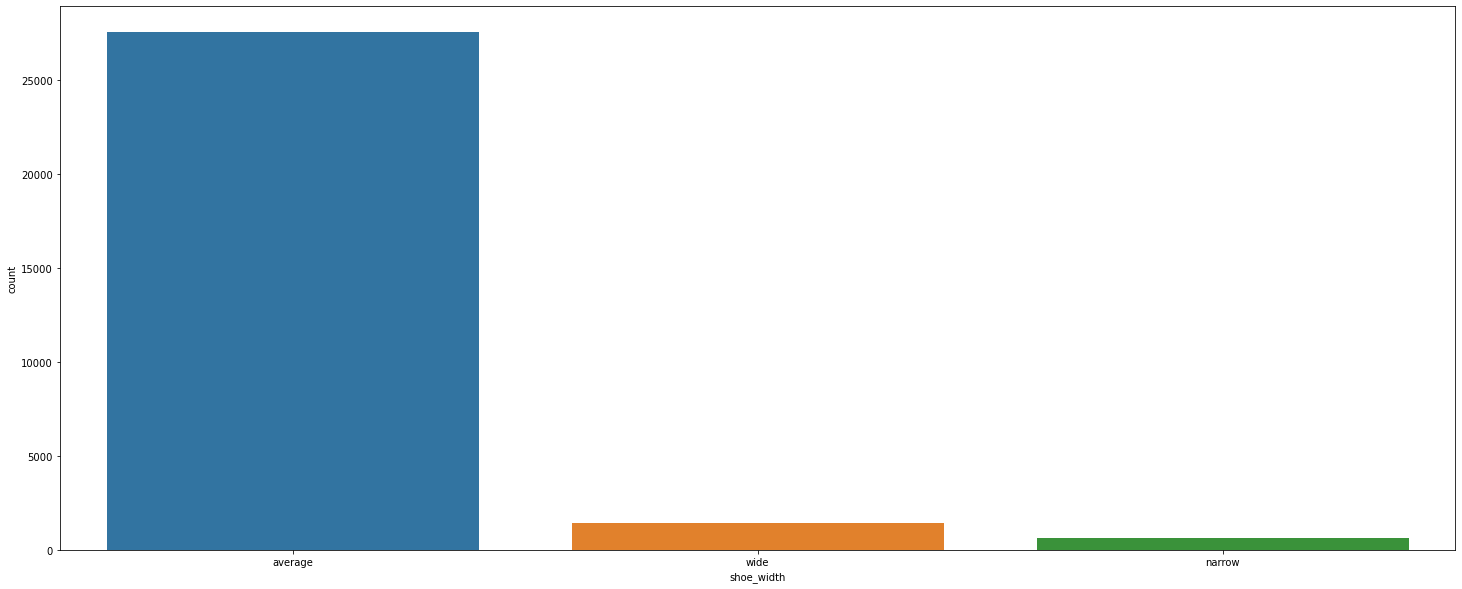

In [70]:
plt.figure(figsize=(25,10))
df_max_quality = copy[copy['quality']==copy['quality'].max()]
sns.countplot(df_max_quality['shoe_width'])
plt.show()

#### Q9. Extract the records belonging to the top 10 reviews, and then find the review summary for the different cup sizes. The basic analysis explains what you would try to infer. Try to use visualization.

In [71]:
copy['review_summary'].value_counts().head(10)

Love it!                     6910
I absolutely love this dr     124
I really wanted to love t      92
Love it                        92
I love this dress so much      84
This is one of my favorit      83
.                              76
I get so many compliments      71
Perfect!                       69
I love everything about t      63
Name: review_summary, dtype: int64

In [72]:
copy.groupby('review_summary').count().reset_index()

,review_summary,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width
0,!,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,!!!,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,!!!!,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,#4 for me! I'm collecting,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,#FashionDeux Absolutely,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61708,you shouldn't have to spe,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
61709,yup.,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
61710,yup. This coat is amazing,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
61711,"zipper stuck a little, bu",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [73]:
a = copy['review_summary'].value_counts().head(10).index
a

Index(['Love it!', 'I absolutely love this dr', 'I really wanted to love t',
       'Love it', 'I love this dress so much', 'This is one of my favorit',
       '.', 'I get so many compliments', 'Perfect!',
       'I love everything about t'],
      dtype='object')

In [74]:
mask = copy['review_summary'].apply(lambda x : x in a)
b = copy[mask]

In [75]:
diff_cup_size = b.groupby(['review_summary', 'cup_size']).size().reset_index()
diff_cup_size

,review_summary,cup_size,0
0,.,a,7
1,.,b,14
2,.,c,32
3,.,d,8
4,.,dd/e,5
...,...,...,...
83,This is one of my favorit,c,25
84,This is one of my favorit,d,16
85,This is one of my favorit,dd/e,8
86,This is one of my favorit,ddd/f,7


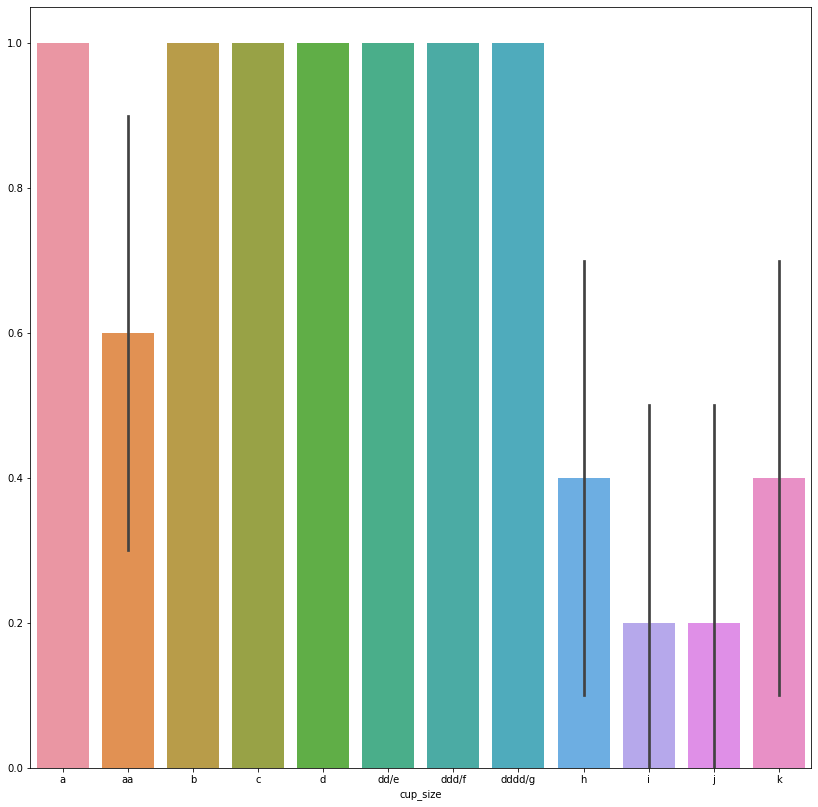

In [76]:
plt.figure(figsize=[14,14])
d = pd.crosstab(diff_cup_size['review_summary'], diff_cup_size['cup_size'])
sns.barplot(data=d)
plt.title('')
plt.show()

#### Q10. Identify the most common review that we got from the customer whose hips size is greater than 35. Find out what kind of inference you can make.

In [77]:
max_hs = copy.loc[copy['hips']>35]
comment_hs = max_hs['review_summary'].mode()[0]
print('The most common review for hips size greather than 35 is :  ',comment_hs)

The most common review for hips size greather than 35 is :   Love it!


In [78]:
copy.review_summary.mode()[0]

'Love it!'

#### Q11. What is the relationship between height and waist? Describe what kind of relationship it has.

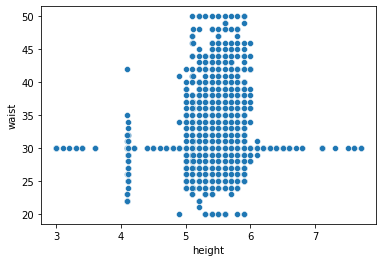

In [79]:
sns.scatterplot(copy.height,copy.waist)
plt.show()

#### Q12. Plot the pair plot for the numerical plot. Explain according to your problem statement how the pair plot would help you.

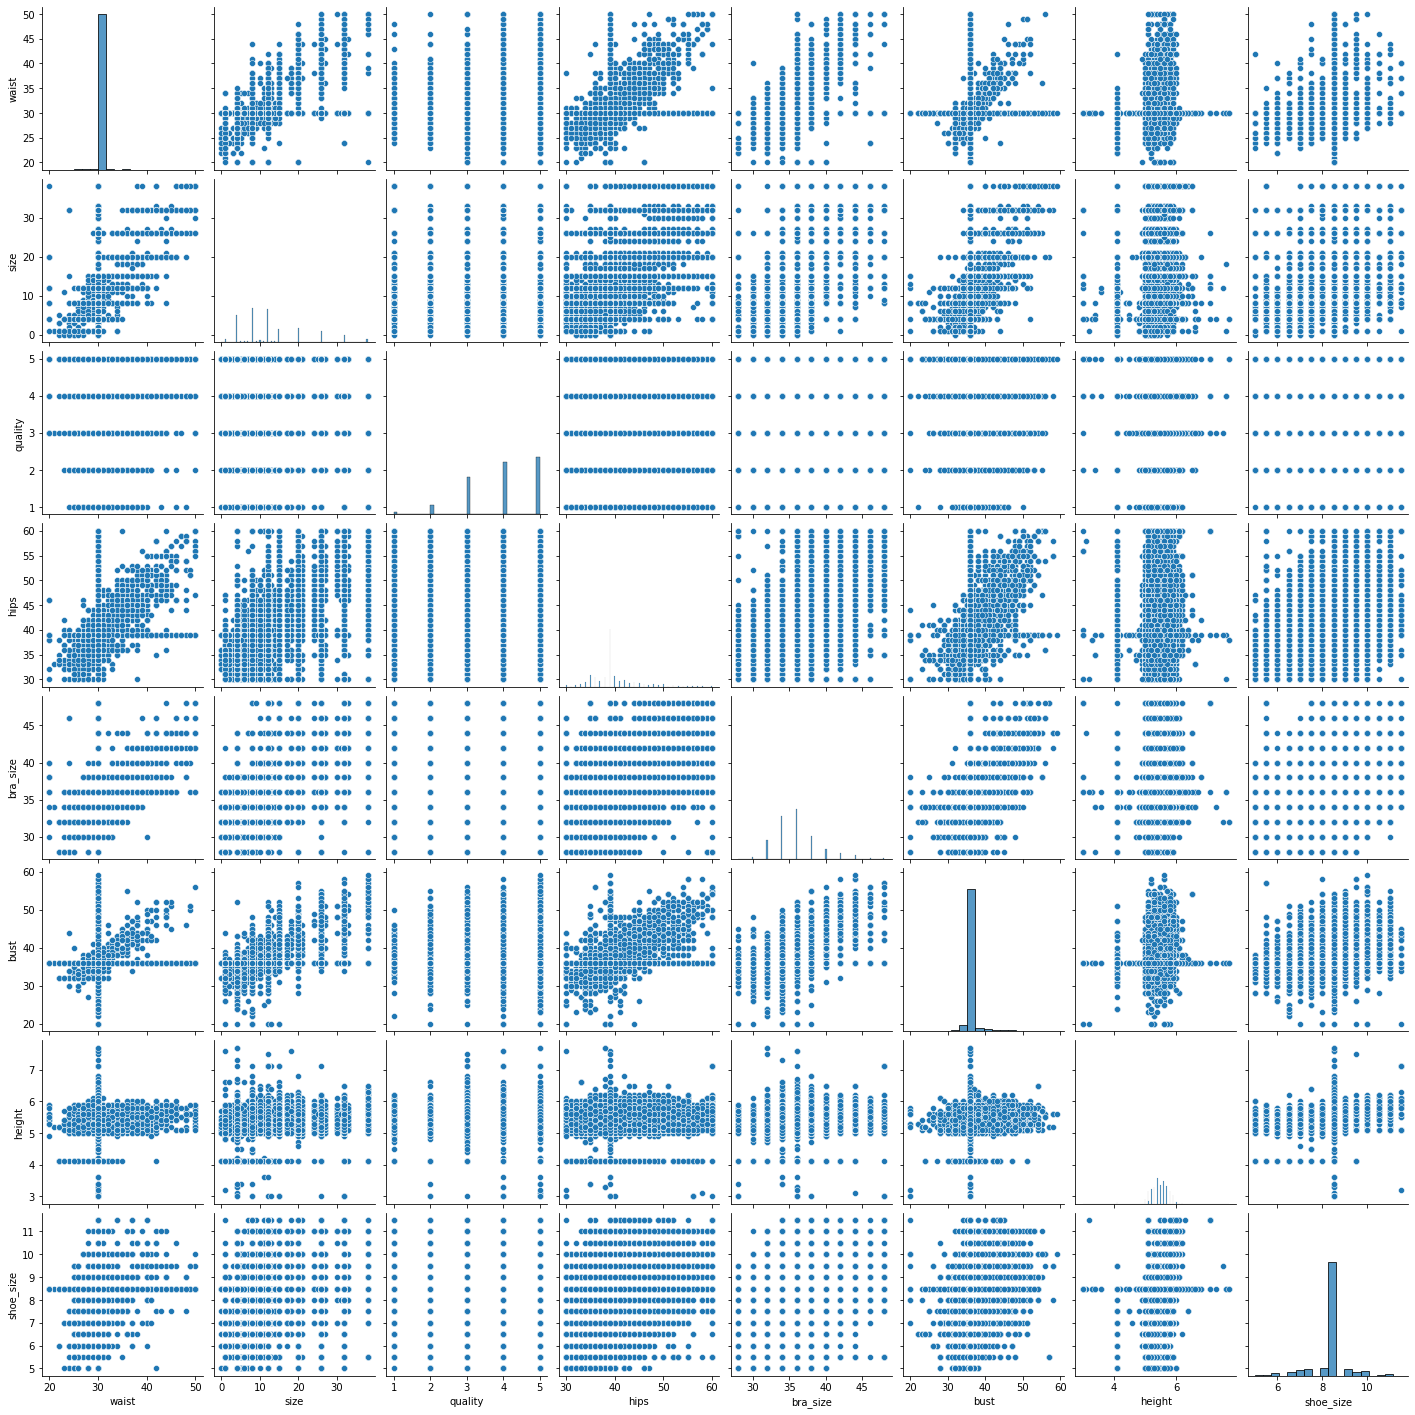

In [80]:
col_num = copy.drop(['item_id','user_id'], axis=1)
df_col_num = col_num.select_dtypes(include='number')
sns.pairplot(data=df_col_num)
plt.show()

## Statistical Analysis:

#### Q1. Test the claim that the category feature and review summary have any relationship among them. The level of significance is 5%.

In [81]:
ct = pd.crosstab(copy['category'], copy['review_summary'])
observed = ct.values
observed.shape

(7, 61713)

In [82]:
### Step 1 : State the Hypotheses
# Ho : Observed frequency and Expected frequency have same distribution
# Ha : Observed frequency and Expected frequency have different distribution

### Step 2 : Decision Criteria
# Right Tail Test 
alpha = 0.05
r=7
c=26864
chisq_alpha = stats.chi2.isf(alpha,df=((r-1)*(c-1)))
print('chisq_alpha',chisq_alpha)

### Step 3 : Calculate Sample Statistic 
test_stat, p, dof, expected_value = stats.chi2_contingency(observed = observed, correction = False)
print("\nExpected values :\n", expected_value)
print("\n\nDegrees of freedom :", dof)
print("\nchisq :", test_stat)

### Step 4 : Critical value method
# Since chisq_alpha < chisq , the sample falls in rejection zone
# We donot reject Ho

### Step 5 : pvalue
print("\np-value :", p)
print('\nalpha :',alpha)
# Since pvalue < alpha , we reject Ho

### Step 6 : Communication of decision
# Hence, Observed frequency and Expected frequency does not have the same distribution.

chisq_alpha 162113.02437886954

Expected values :
 [[0.3687885  0.18439425 0.18439425 ... 0.18439425 0.18439425 0.18439425]
 [0.4505375  0.22526875 0.22526875 ... 0.22526875 0.22526875 0.22526875]
 [0.51909651 0.25954825 0.25954825 ... 0.25954825 0.25954825 0.25954825]
 ...
 [0.06097355 0.03048677 0.03048677 ... 0.03048677 0.03048677 0.03048677]
 [0.49194347 0.24597174 0.24597174 ... 0.24597174 0.24597174 0.24597174]
 [0.00664331 0.00332166 0.00332166 ... 0.00332166 0.00332166 0.00332166]]


Degrees of freedom : 370272

chisq : 428425.05922989716

p-value : 0.0

alpha : 0.05


In [83]:
# To check the normality we will test Shapiro Wilke's Test.
shapiro = stats.shapiro([copy['size'],copy['hips']])
shapiro

ShapiroResult(statistic=0.888312816619873, pvalue=0.0)

#### Q2. Test statistically whether the size and hips have any relationship using 0.05 alpha. Before the above test, Test the normality test.

In [84]:
crr = copy['size'].corr(copy['hips'])
print('Correlation :',round(crr,3))

Correlation : 0.589


In [85]:
# There is positive correlation

# Ho : there is relationship betweem size and hips
# Ha : there is no relationship between size and hips

test_stat,p_value=stats.pearsonr(copy['size'],copy['hips'])
print('Test Statistics :',test_stat)
print('P-value :',p_value)

Test Statistics : 0.5888978928845114
P-value : 0.0


#### Q3. Does the quality significantly differ for any one shoe width? Test the test with 96%confidence intervals.Check the normality of the data before the above test. Alpha = .05

In [86]:
t = pd.crosstab(copy['quality'],copy['shoe_width'])
observed=t.values
print('Observed Value :\n\n',observed)

Observed Value :

 [[ 1247    26    71]
 [ 4800    89   241]
 [18235   347   944]
 [25434   483  1269]
 [27564   607  1433]]


In [87]:
### Step 1 : State the Hypotheses
# Ho : Observed frequency and Expected frequency have same distribution
# Ha : Observed frequency and Expected frequency have different distribution

### Step 2 : Decision Criteria
# Right Tail Test 
alpha = 0.05
r=5
c=3
chisq_alpha = stats.chi2.isf(alpha,df=((r-1)*(c-1)))
print('chisq_alpha :',chisq_alpha)

### Step 3 : Calculate Sample Statistic 
test_stat, p, dof, expected_value = stats.chi2_contingency(observed = observed, correction = False)
print("\nExpected values :\n", expected_value)
print("\nDegrees of freedom :", dof)
print("\nchisq :", test_stat)

### Step 4 : Critical value method
# Since chisq_alpha < chisq , the sample fall in rejection zone
# We reject Ho

### Step 5 : pvalue
print("\nP-value :", p)
print('\nAlpha :',alpha)
# Since pvalue < alpha , we reject Ho

### Step 6 : Communication of decision
# Hence, Observed frequency and Expected frequency have different distribution
# So,type of car maintenance is not dependent on the type of car's transmission.

chisq_alpha : 15.507313055865454

Expected values :
 [[1.25455152e+03 2.51949269e+01 6.42535572e+01]
 [4.78857833e+03 9.61681362e+01 2.45253533e+02]
 [1.82264679e+04 3.66038797e+02 9.33493272e+02]
 [2.53766648e+04 5.09634883e+02 1.29970030e+03]
 [2.76337374e+04 5.54963256e+02 1.41529934e+03]]

Degrees of freedom : 8

chisq : 10.050738341600193

P-value : 0.26148279915330563

Alpha : 0.05


#### Q4. Check if the shoe width feature affects the review summary with a 99% confidence interval.

In [88]:
copy['shoe_width'].value_counts()

average    77280
wide        3958
narrow      1552
Name: shoe_width, dtype: int64

In [89]:
alpha = 0.01
table = pd.crosstab(copy['shoe_width'], copy['review_summary'])
observed = table.values
observed

array([[2, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [90]:
# step1: 
# Ho: The variables are independent
# Ha: The variables are not independent
    
# step2: Decision criteria: 
# Contingency test, always right tail test

# step3: We will use stats.chi2_contingency funtion that returns test_stat, p, dof, expected_value
test_stat, p, dof, expected_value = stats.chi2_contingency(observed, correction = False)

print("\nExpected values :\n", expected_value)
print("\nDegrees of freedom :", dof)
print("\nchisq :", test_stat)

# step4: P value comparison
# p value is lesser than alpha (0.01), hence it lies in the rejection zone

#step 5: Decision
print("\nP-value :", p)
print('\nAlpha :',alpha)
#We will reject the null hypothesis i.e., the variables are not independent


Expected values :
 [[1.86689214 0.93344607 0.93344607 ... 0.93344607 0.93344607 0.93344607]
 [0.03749245 0.01874623 0.01874623 ... 0.01874623 0.01874623 0.01874623]
 [0.09561541 0.04780771 0.04780771 ... 0.04780771 0.04780771 0.04780771]]

Degrees of freedom : 123424

chisq : 129510.89002085809

P-value : 8.929642565661796e-34

Alpha : 0.01


#### Q5. Check if the length feature affects the review summary with a 95% confidence interval.

In [91]:
alpha = 0.05
table = pd.crosstab(copy['length'], copy['review_summary'])
observed = table.values
observed

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [92]:
# step1: 
# Ho: The variables are independent
# Ha: The variables are not independent
    
# step2: Decision criteria: 
# Contingency test, always right tail test

# step3: We will use stats.chi2_contingency funtion that returns test_stat, p, dof, expected_value
test_stat, p, dof, expected_value = stats.chi2_contingency(observed, correction = False)

print("\nExpected values :\n", expected_value)
print("\nDegrees of freedom :", dof)
print("\nchisq :", test_stat)

# step4: P value comparison
# p value is lesser than alpha (0.01), hence it lies in the rejection zone

#step 5: Decision
print("\nP-value :", p)
print('\nAlpha :',alpha)
#We will reject the null hypothesis i.e., the variables are not independent


Expected values :
 [[1.49725812 0.74862906 0.74862906 ... 0.74862906 0.74862906 0.74862906]
 [0.27203769 0.13601884 0.13601884 ... 0.13601884 0.13601884 0.13601884]
 [0.15265129 0.07632564 0.07632564 ... 0.07632564 0.07632564 0.07632564]
 [0.05865443 0.02932721 0.02932721 ... 0.02932721 0.02932721 0.02932721]
 [0.01939848 0.00969924 0.00969924 ... 0.00969924 0.00969924 0.00969924]]

Degrees of freedom : 246848

chisq : 265422.836206021

P-value : 4.266157008823606e-147

Alpha : 0.05


#### Q6. Does the average quality significantly differ for the different fits? Kindly test the relevant hypothesis test by having 0.05 alpha. Check the normality of the data before the above test. Alpha = .05

In [93]:
copy['fit'].value_counts()

fit      56757
large    13059
small    12974
Name: fit, dtype: int64

In [94]:
copy['quality'].value_counts()

5.0    29604
4.0    27186
3.0    19526
2.0     5130
1.0     1344
Name: quality, dtype: int64

In [95]:
table = pd.crosstab(copy['fit'], copy['quality'])
observed = table.values
observed

array([[  636,  2366, 11742, 18912, 23101],
       [  246,  1063,  3397,  4326,  4027],
       [  462,  1701,  4387,  3948,  2476]])

In [96]:
# step1: 
# Ho: The variables are independent
# Ha: The variables are not independent
    
# step2: Decision criteria: 
# Contingency test, always right tail test

# step3: We will use stats.chi2_contingency funtion that returns test_stat, p, dof, expected_value
alpha = 0.05
test_stat, p, dof, expected_value = stats.chi2_contingency(observed, correction = False)

print("\nExpected values :\n", expected_value)
print("\nDegrees of freedom :", dof)
print("\nchisq :", test_stat)

# step4: P value comparison
# p value is lesser than alpha (0.01), hence it lies in the rejection zone

#step 5: Decision
print("\nP-value :", p)
print('\nAlpha :',alpha)
#We will reject the null hypothesis i.e., the variables are not independent


Expected values :
 [[  921.38432178  3516.89104964 13386.12371059 18637.46590168
  20295.13501631]
 [  211.99777751   809.1879454   3079.96175867  4288.22290132
   4669.6296171 ]
 [  210.61790071   803.92100495  3059.91453074  4260.311197
   4639.23536659]]

Degrees of freedom : 8

chisq : 4173.60654034701

P-value : 0.0

Alpha : 0.05
